## Inicjalizacja


In [1]:
from laptoppriceworkflow.data import get_json_data 
from laptoppriceworkflow.functions import clean_col_meta
from laptoppriceworkflow.functions import simplify_gwarancja
from laptoppriceworkflow.functions import simplify_komunikacja

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

df = get_json_data()

# Partycjonowanie
Preprocessing przygotowania modelu bedzie przeprowadzany tylko na czesci treningowej 
Pozniej przepuszcze przez niego czesc testowa, ktora swtorzylem oraz dodtkowy plik bez zmiennej celu

In [2]:
msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

# Wstępna Analiza

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5954 entries, 70 to 8727
Data columns (total 17 columns):
buynow_price                         5954 non-null float64
rodzaj karty graficznej              5582 non-null object
komunikacja                          5374 non-null object
rozdzielczość (piksele)              5504 non-null object
liczba rdzeni procesora              5954 non-null object
wielkość pamięci ram                 5620 non-null object
system operacyjny                    5468 non-null object
typ dysku twardego                   5631 non-null object
sterowanie                           5443 non-null object
multimedia                           5420 non-null object
typ pamięci ram                      5309 non-null object
taktowanie bazowe procesora (ghz)    5252 non-null float64
seria procesora                      5563 non-null object
stan                                 5954 non-null object
pojemność dysku (gb)                 5596 non-null float64
gwarancja          

In [4]:
train.isnull().sum()/train.shape[0]

buynow_price                         0.000000
rodzaj karty graficznej              0.062479
komunikacja                          0.097414
rozdzielczość (piksele)              0.075579
liczba rdzeni procesora              0.000000
wielkość pamięci ram                 0.056097
system operacyjny                    0.081626
typ dysku twardego                   0.054249
sterowanie                           0.085825
multimedia                           0.089688
typ pamięci ram                      0.108331
taktowanie bazowe procesora (ghz)    0.117904
seria procesora                      0.065670
stan                                 0.000000
pojemność dysku (gb)                 0.060128
gwarancja                            0.000000
wielkość matrycy                     0.043668
dtype: float64

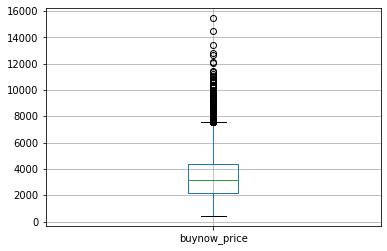

In [17]:
train.boxplot("buynow_price")

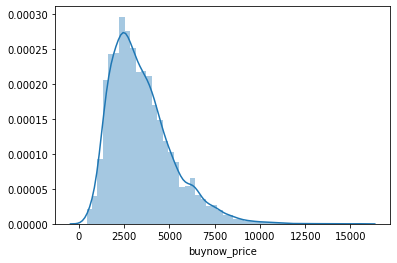

In [18]:
sns.distplot(train["buynow_price"])
plt.show()

# Budowa Preprocesingu

In [5]:
train = clean_col_meta(train)

In [6]:
train.head()

,buynow_price,rodzaj_karty_graficznej,komunikacja,rozdzielczość_piksele,liczba_rdzeni_procesora,wielkość_pamięci_ram,system_operacyjny,typ_dysku_twardego,sterowanie,multimedia,typ_pamięci_ram,taktowanie_bazowe_procesora_ghz,seria_procesora,stan,pojemność_dysku_gb,gwarancja,wielkość_matrycy
70,1599.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.9,intel core i3,nowy,500.0,sprzedawcy,"13"" - 13.9"""
1359,2849.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.0,intel core i3,nowy,480.0,producenta,"15"" - 15.9"""
10567,2319.00,None,None,None,2,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
3203,1302.91,grafika zintegrowana,"[bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.5,intel celeron dual-core,nowy,128.0,sprzedawcy,"15"" - 15.9"""
7831,1699.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,4 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,1.6,intel pentium quad-core,nowy,120.0,producenta,"15"" - 15.9"""


In [7]:
train["gwarancja"].value_counts()
grouped_gwarancja = train['buynow_price'].groupby(train["gwarancja"])
grouped_gwarancja.mean()

gwarancja
brak          1988.857143
producenta    3718.407693
sprzedawcy    2179.113718
Name: buynow_price, dtype: float64

In [26]:
df.loc[df.gwarancja == 'brak', 'gwarancja'] = 'sprzedawcy'

In [19]:
df[df.gwarancja == 'brak']['gwarancja']

Series([], Name: gwarancja, dtype: object)

In [14]:
train =  simplify_gwarancja(train)

In [18]:
df.head(10)

,buynow_price,rodzaj_karty_graficznej,komunikacja,rozdzielczość_piksele,liczba_rdzeni_procesora,wielkość_pamięci_ram,system_operacyjny,typ_dysku_twardego,sterowanie,multimedia,typ_pamięci_ram,taktowanie_bazowe_procesora_ghz,seria_procesora,stan,pojemność_dysku_gb,gwarancja,wielkość_matrycy
70,1599.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1366 x 768,2,8 gb,[windows 10 home],hdd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.9,intel core i3,nowy,500.0,sprzedawcy,"13"" - 13.9"""
1359,2849.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,8 gb,[windows 10 professional],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.0,intel core i3,nowy,480.0,producenta,"15"" - 15.9"""
10567,2319.00,None,None,None,2,None,None,None,None,None,None,NaN,None,nowy,NaN,producenta,None
3203,1302.91,grafika zintegrowana,"[bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3,1.5,intel celeron dual-core,nowy,128.0,sprzedawcy,"15"" - 15.9"""
7831,1699.00,grafika zintegrowana,"[wi-fi, bluetooth, lan 10/100 mbps]",1366 x 768,4,4 gb,[windows 10 home],ssd,"[klawiatura, touchpad, klawiatura numeryczna]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr3l,1.6,intel pentium quad-core,nowy,120.0,producenta,"15"" - 15.9"""
7524,5043.00,grafika dedykowana,"[bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[windows 10 home],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki]",ddr3,2.6,intel core i5,nowy,1000.0,producenta,"15"" - 15.9"""
10973,6519.00,grafika dedykowana,"[bluetooth, lan 10/100/1000 mbps, lan 10/100 m...",3840 x 2160,4,16 gb,[windows 10 home],hdd,"[klawiatura, touchpad, klawiatura podświetlana]","[kamera, głośniki, mikrofon]",ddr4,2.8,intel core i7,nowy,240.0,producenta,"15"" - 15.9"""
1510,2677.00,grafika dedykowana,"[wi-fi 802.11 a/b/g/n/ac, bluetooth, lan 10/10...",1920 x 1080,2,12 gb,[brak systemu],ssd,"[klawiatura, touchpad, klawiatura podświetlana...","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.4,intel core i3,nowy,240.0,producenta,"15"" - 15.9"""
8158,2669.00,grafika dedykowana,"[bluetooth, lan 10/100 mbps]",1366 x 768,2,8 gb,[brak systemu],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki]",ddr3,2.6,intel core i5,nowy,480.0,producenta,"15"" - 15.9"""
11252,2799.00,grafika dedykowana,"[wi-fi, bluetooth, lan 10/100/1000 mbps]",1920 x 1080,2,8 gb,[brak systemu],ssd,"[klawiatura, touchpad]","[czytnik kart pamięci, kamera, głośniki, mikro...",ddr4,2.5,intel core i5,nowy,256.0,producenta,"14"" - 14.9"""


In [ ]:
g = sns.FacetGrid(train, col="gwarancja_t", height=6)
g.map(sns.kdeplot, "buynow_price", shade=True)
sns.despine(left = True, bottom =True )
plt.show()

In [ ]:
##############################################################################
#### Komunikacja

train["komunikacja"].astype(str).value_counts()

In [ ]:
train["komunikacja"].isna().sum()

In [ ]:
train = simplify_komunikacja(train)

In [11]:
df["lan 10/100 mbps"] = (df["komunikacja"].str.contains('lan 10/100 mbps', regex=False)*1).sum()

In [12]:
df["lan 10/100/1000 mbps"] = (df["komunikacja"].str.contains('lan 10/100/1000 mbps', regex=False)*1).sum()

In [13]:
(df["komunikacja"].str.contains('nfc (near field communication)', regex=False)*1).sum()

1454

In [14]:
(df["komunikacja"].str.contains('modem 3g (wwan)', regex=False)*1).sum()

1009

In [15]:
(df["komunikacja"].str.contains('gps', regex=False)*1).sum()

269

In [16]:
(df["komunikacja"].str.contains('intel wireless display (widi)', regex=False)*1).sum()

1004

In [17]:
(df["komunikacja"].str.contains('modem 4g (lte)', regex=False)*1).sum()

267

In [18]:
(df["komunikacja"].str.contains('wi-fi 802.11 b/g/n', regex=False)*1).sum()

73

In [19]:
(df["komunikacja"].str.contains('wi-fi 802.11 b/g/n/ac', regex=False)*1).sum()

166

In [20]:
(df["komunikacja"].str.contains('wi-fi 802.11 a/b/g/n/ac', regex=False)*1).sum()

143

In [21]:
(df["komunikacja"].str.contains('wi-fi 802.11 a/b/g/n', regex=False)*1).sum()

17

In [22]:
df.shape

(7853, 20)

In [23]:
160/7853

0.020374379218133197

In [24]:
df.columns

Index(['buynow_price', 'rodzaj karty graficznej', 'komunikacja',
       'rozdzielczość (piksele)', 'liczba rdzeni procesora',
       'wielkość pamięci ram', 'system operacyjny', 'typ dysku twardego',
       'sterowanie', 'multimedia', 'typ pamięci ram',
       'taktowanie bazowe procesora (ghz)', 'seria procesora',
       'pojemność dysku (gb)', 'gwarancja', 'wielkość matrycy ', 'bluetooth',
       'wi-fi', 'lan 10/100 mbps', 'lan 10/100/1000 mbps'],
      dtype='object')

In [25]:
df.index

Int64Index([   70,  1489,   407,  1359, 10567,  3203,  7831,  4586,  7524,
            10973,
            ...
             6423,  7596, 11321, 11695,  6406, 10541,  8281,  8053,  8727,
             5978],
           dtype='int64', length=7853)

In [26]:
assert all(df.columns == ['buynow_price', 'rodzaj karty graficznej', 'komunikacja','rozdzielczość (piksele)', 'liczba rdzeni procesora',
        'wielkość pamięci ram', 'system operacyjny', 'typ dysku twardego',
        'sterowanie', 'multimedia', 'typ pamięci ram',
        'taktowanie bazowe procesora (ghz)', 'seria procesora',
        'pojemność dysku (gb)', 'gwarancja', 'wielkość matrycy ', 'bluetooth',
        'wi-fi', 'lan 10/100 mbps', 'lan 10/100/1000 mbps'])